**MODEL FOR PREDICTING CARDIOVASCULAR DISEASE USING MACHINE LEARNING ALGORITHMS**

IMPORTING LIBRARIES:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

LOADING THE DATA:

**Dataset source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Content:** This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The **Cleveland database** is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has cardiovascular disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

**Attributes information:**
* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)




In [ ]:
dataframe=pd.read_csv("heart.csv")

In [ ]:
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Our data has 3 types of data:
* Continuous: which is quantitative data that can be measured
* Ordinal Data: Categorical data that has a order to it (0,1,2,3, etc)
* Binary Data: data whose unit can take on only two possible states ( 0 &1 )

DATA ANALYSIS

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
dataframe.shape

(1025, 14)

In [ ]:
dataframe.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
categorical_val = []
continous_val = []
for column in dataframe.columns:
    print('==============================')
    print(f"{column} : {dataframe[column].unique()}")
    if len(dataframe[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
dataframe.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
pd.set_option("display.float","{:.2f}".format)
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


The features described in the above data set are:

1. Count: tells us the number of NoN-empty rows in a feature.

2. Mean: tells us the mean value of that feature.

3. Std: tells us the Standard Deviation Value of that feature.

4. Min: tells us the minimum value of that feature.

5. 25%, 50%, and 75%: are the percentile/quartile of each features.

6. Max: tells us the maximum value of that feature.

In [ ]:
#Checking for null values
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since there are no null values and duplicates, our data is good to go for analysis and visualizations

In [ ]:
dataframe.target.value_counts()

1    526
0    499
Name: target, dtype: int64

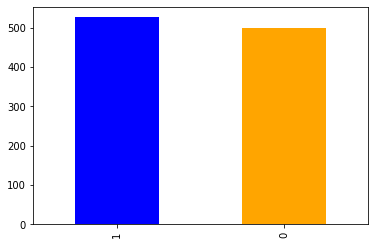

In [ ]:
dataframe.target.value_counts().plot(kind="bar",color=["blue","orange"])

In [ ]:
correlation=dataframe.corr()
pd.DataFrame(correlation['target']).sort_values(by='target',ascending=False)


,target
target,1.00
cp,0.43
thalach,0.42
slope,0.35
restecg,0.13
fbs,-0.04
chol,-0.10
trestbps,-0.14
age,-0.23
sex,-0.28


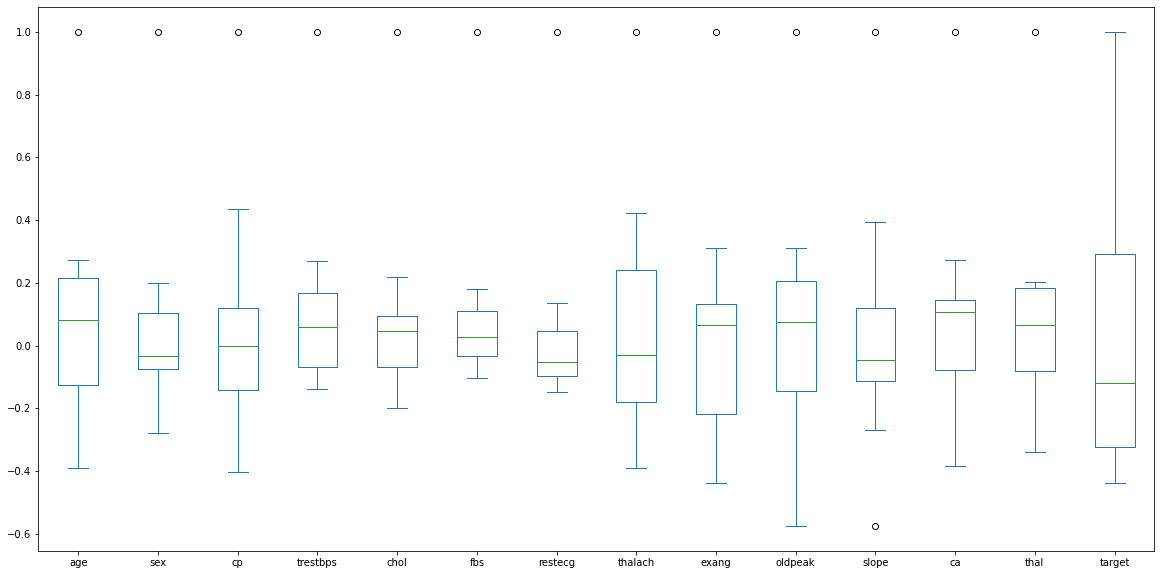

In [ ]:
correlation.plot(kind="box",figsize=(20,10))

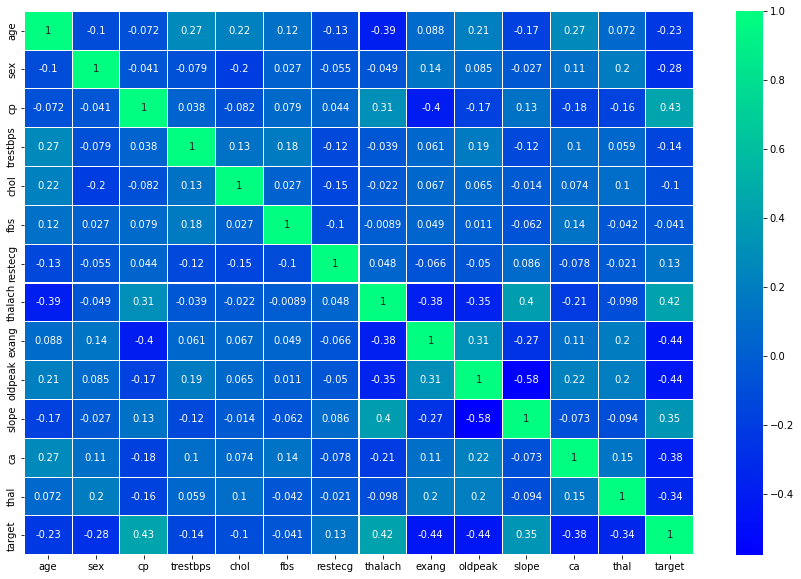

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

From the above heatmap, we can understand that Chest pain(cp) and target have positive correlation. It means that whose has large risk of chest pain results in greater chance to have heart disease.
In addition to chest pain, thalach,slope and restecg have positive correlation with target.

Then, exercise induced angina(exang) and target has negative correlation which means when we exercise, heart requires more blood, but narrowed arteries slow down the blood flow.
In addition to ca,oldpeak,thal have negative correlation with target.

Now, we can find the relationship between target with each features with the help of histogram.

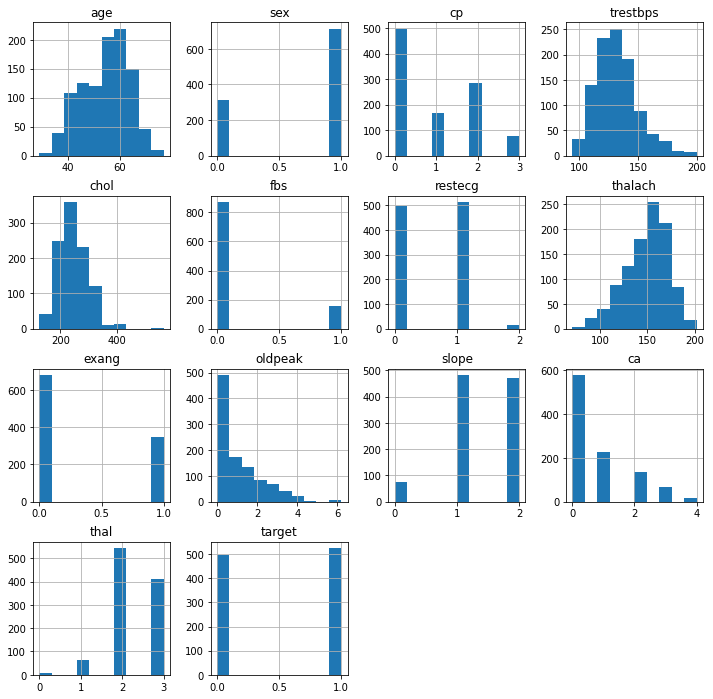

In [ ]:

dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

Now, we shall find relationship between target and mostly risk factors/features which cause cardiovascular disease.

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

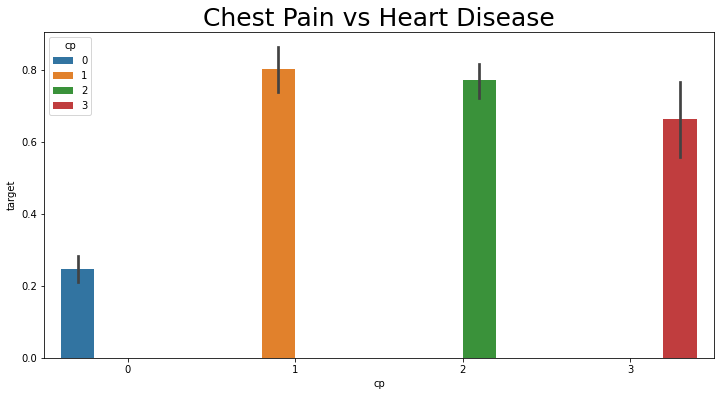

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(y='target',x='cp',hue='cp',ax=ax,data=dataframe)
plt.title('Chest Pain vs Heart Disease',size=25)

Text(0.5, 1.0, 'Gender vs target')

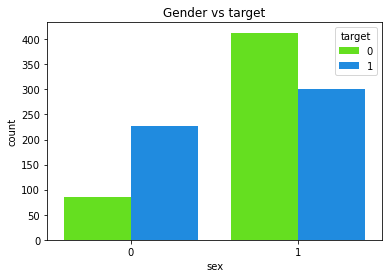

In [ ]:
sns.countplot(data=dataframe,x='sex',hue='target',palette='gist_rainbow')
plt.title('Gender vs target')

According to this dataset, males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women and Sudden Heart Attacks are experienced by men between 70-90%.

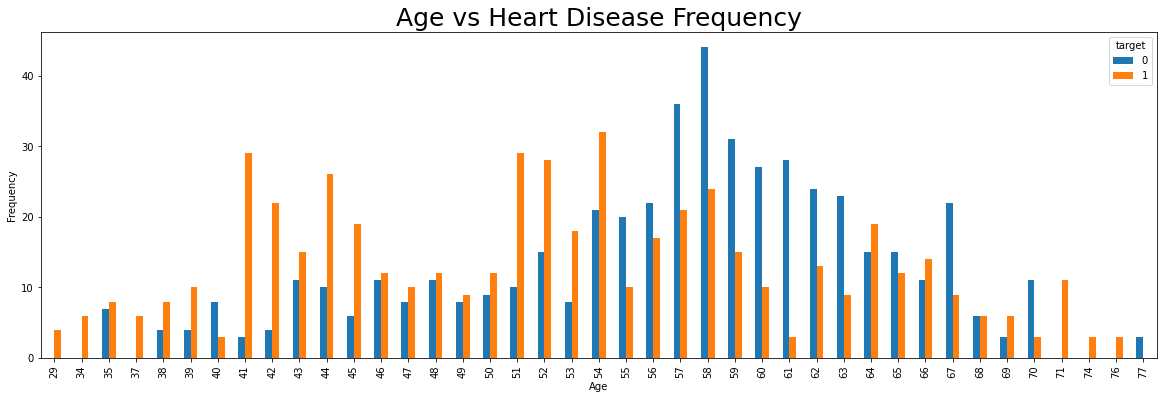

In [ ]:
pd.crosstab(dataframe.age,dataframe.target).plot(kind="bar",figsize=(20,6))
plt.title('Age vs Heart Disease Frequency',size=25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the above analysis, frequency of Heart Disease is very common in the seniors and adults which belong to the age group of 41 to 60. But it’s very rare among the age group of 19 to 30.

## **Feature** **selection**

In [ ]:
from sklearn.feature_selection import chi2
X = dataframe.drop('target',axis=1)
y = dataframe['target']
chi_scores = chi2(X,y)
chi_scores

(array([ 81.42536762,  24.37365008, 217.82392171,  45.97406854,
        110.72336371,   1.47754962,   9.73934262, 650.00849349,
        130.47092725, 253.65346109,  33.67394807, 210.62591949,
         19.37346461]),
 array([1.82006646e-019, 7.93466060e-007, 2.69806406e-049, 1.19828657e-011,
        6.80314928e-026, 2.24158301e-001, 1.80365390e-003, 2.22466183e-143,
        3.23231840e-030, 4.14929994e-057, 6.51676273e-009, 1.00301831e-047,
        1.07490299e-005]))

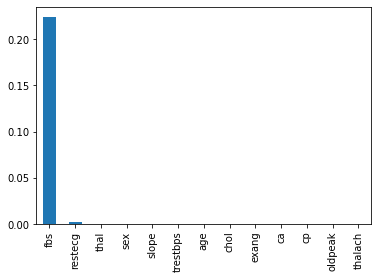

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [ ]:
from sklearn.feature_selection import SelectKBest
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
print(X_kbest)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

[[168.    1. ]
 [155.    3.1]
 [125.    2.6]
 ...
 [118.    1. ]
 [159.    0. ]
 [113.    1.4]]
Original number of features: (1025, 13)
Reduced number of features: (1025, 2)


In [ ]:
df = dataframe.dropna()
df = df.drop(columns = [ 'slope', 'thal', 'fbs', 'restecg', 'exang','sex'])

df.head()

,age,cp,trestbps,chol,thalach,oldpeak,ca,target
0,52,0,125,212,168,1.00,2,0
1,53,0,140,203,155,3.10,0,0
2,70,0,145,174,125,2.60,0,0
3,61,0,148,203,161,0.00,1,0
4,62,0,138,294,106,1.90,3,0


In [ ]:
correlat=df.corr()
pd.DataFrame(correlat['target']).sort_values(by='target',ascending=False)

,target
target,1.00
cp,0.43
thalach,0.42
chol,-0.10
trestbps,-0.14
age,-0.23
ca,-0.38
oldpeak,-0.44


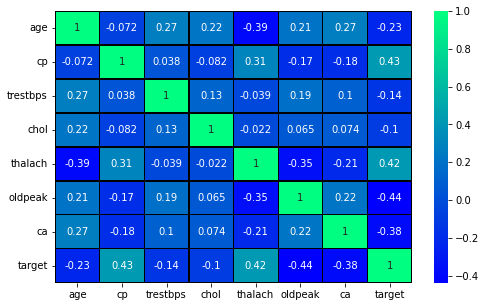

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),linewidths=0.3, linecolor='black',annot_kws={"size": 10},annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

In [ ]:

dataset = pd.get_dummies(dataframe, columns = categorical_val)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,52,125,212,168,1.00,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,53,140,203,155,3.10,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,70,145,174,125,2.60,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,61,148,203,161,0.00,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
4,62,138,294,106,1.90,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
dataset = pd.get_dummies(dataframe, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.27,-0.38,-0.66,0.82,-0.06,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.16,0.48,-0.83,0.26,1.73,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.72,0.76,-1.40,-1.05,1.30,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.72,0.94,-0.83,0.52,-0.91,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.83,0.36,0.93,-1.87,0.71,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:

X= df.drop(['target'], axis=1)
y= df['target']

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [ ]:
print('X_train-', X_train.shape)
print('X_test-',X_test.shape)
print('y_train-', y_train.shape)
print('y_test-', y_test.shape)

X_train- (768, 7)
X_test- (257, 7)
y_train- (768,)
y_test- (257,)


In [ ]:
X_test.head()

,age,cp,trestbps,chol,thalach,oldpeak,ca
1003,52,0,108,233,147,0.10,3
758,46,1,105,204,172,0.00,0
498,54,0,140,239,160,1.20,0
715,70,1,156,245,143,0.00,0
1008,42,1,120,295,162,0.00,0


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='liblinear')


Testing Accuracy for Logistic Regression: 0.7859922178988327
Testing Sensitivity for Logistic Regression: 0.8035714285714286
Testing Specificity for Logistic Regression: 0.7724137931034483
Testing Precision for Logistic Regression: 0.7317073170731707


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


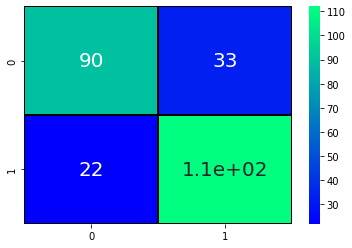

In [ ]:
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.7859922178988327
Testing Sensitivity for Logistic Regression: 0.8035714285714286
Testing Specificity for Logistic Regression: 0.7724137931034483
Testing Precision for Logistic Regression: 0.7317073170731707
Testing Accuracy for Logistic Regression: 0.7859922178988327
Testing Sensitivity for Logistic Regression: 0.8035714285714286
Testing Specificity for Logistic Regression: 0.7724137931034483
Testing Precision for Logistic Regression: 0.7317073170731707


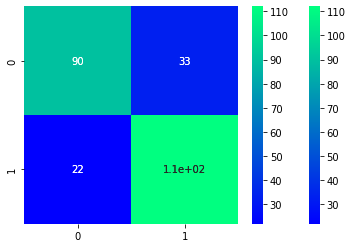

In [ ]:

for c in range(4,6):
  lr=LogisticRegression(C=c)
  model1=lr.fit(X_train,y_train)
  prediction1=model1.predict(X_test)
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,prediction1)
  cm
  sns.heatmap(cm, annot=True,cmap='winter')
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
  print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
  print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
  print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       123
           1       0.77      0.84      0.80       134

    accuracy                           0.79       257
   macro avg       0.79      0.78      0.78       257
weighted avg       0.79      0.79      0.79       257



In [ ]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(y_test,model1.predict(X_test) ) * 100
train_score = accuracy_score(y_train, model1.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Logistic Regression', 'Training Results %', 'Testing Results %'])
results_df

,Logistic Regression,Training Results %,Testing Results %
0,Logistic Regression,79.43,78.60


randomized search cv for dt:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={
    'criterion':('gini','entropy'),
    'max_depth':(3,5,7,9,10),
    'max_features':('auto','sqrt','log2'),
    'min_samples_split': (2,4,6)
}
dt_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv=10, verbose=True)
dt_grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [ ]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=9, max_features='log2')

In [ ]:
!pip install graphviz

In [ ]:
!pip install pyparsing
!pip install pydotplus

k-fold implementation

In [ ]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 922, Test set:103
Fold:2, Train set: 922, Test set:103
Fold:3, Train set: 922, Test set:103
Fold:4, Train set: 922, Test set:103
Fold:5, Train set: 922, Test set:103
Fold:6, Train set: 923, Test set:102
Fold:7, Train set: 923, Test set:102
Fold:8, Train set: 923, Test set:102
Fold:9, Train set: 923, Test set:102
Fold:10, Train set: 923, Test set:102


In [ ]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [ ]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.02912621 -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.02941176]
rmse= 0.08


In [ ]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.43
For max depth: 2
rmse= 0.39
For max depth: 3
rmse= 0.36
For max depth: 4
rmse= 0.34
For max depth: 5
rmse= 0.29
For max depth: 6
rmse= 0.25
For max depth: 7
rmse= 0.18
For max depth: 8
rmse= 0.13
For max depth: 9
rmse= 0.09
For max depth: 10
rmse= 0.08


In [ ]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.97087379 1.         1.         1.         1.         1.
 1.         1.         1.         0.97058824]
Average score: 0.99


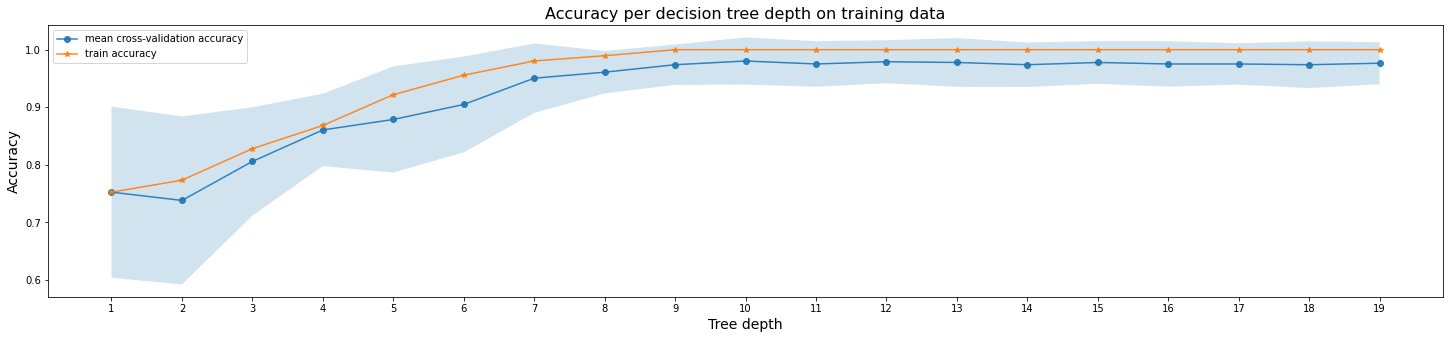

In [ ]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(25,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

sm_tree_depths = range(1,20)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


              precision    recall  f1-score   support

           0       0.93      0.85      0.89       123
           1       0.87      0.94      0.90       134

    accuracy                           0.89       257
   macro avg       0.90      0.89      0.89       257
weighted avg       0.90      0.89      0.89       257



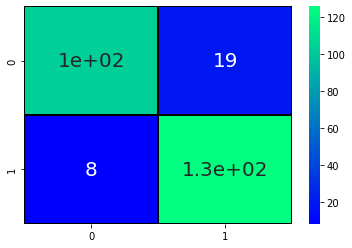

In [ ]:

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))



In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

Testing Accuracy for Decision Tree: 0.8949416342412452
Testing Sensitivity for Decision Tree: 0.9285714285714286
Testing Specificity for Decision Tree: 0.8689655172413793
Testing Precision for Decision Tree: 0.8455284552845529


In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5)))


The depth-10 tree achieves the best mean cross-validation accuracy 98.0434 on training dataset


In [ ]:
predictiontree=tree_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      0.98      0.99       134

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



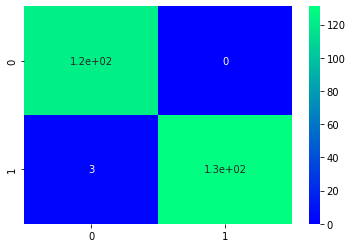

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtclas=DecisionTreeClassifier()
modeldt=dtclas.fit(X_train,y_train)
predictiondt=modeldt.predict(X_test)
cmdt= confusion_matrix(y_test,predictiondt)
sns.heatmap(cmdt, annot=True,cmap='winter')
print(classification_report(y_test, predictiondt))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                              
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False)
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9844357976653697


96.89
Testing Accuracy for Random Forest: 0.9688715953307393
Testing Sensitivity for Random Forest: 0.9831932773109243
Testing Specificity for Random Forest: 0.9565217391304348
Testing Precision for Random Forest: 0.9512195121951219


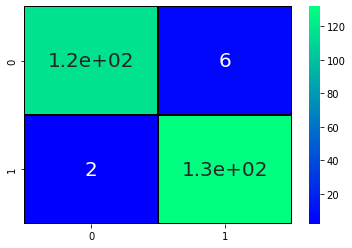

In [ ]:

rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [ ]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       123
           1       0.96      0.99      0.97       134

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



SVM ALGORITHM


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
from sklearn.svm import SVC
for temp in range(1,100,5):
  svm=SVC(C=temp,kernel='linear')
 


Testing Accuracy for SVM: 0.7782101167315175


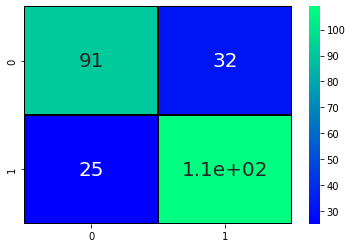

In [ ]:
  svm=SVC(C=12,kernel='linear')
  model4=svm.fit(X_train,y_train)
  prediction4=model4.predict(X_test)
  cm4= confusion_matrix(y_test,prediction4)
  sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
  TP=cm4[0][0]
  TN=cm4[1][1]
  FN=cm4[1][0]
  FP=cm4[0][1]
  
  print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))


In [ ]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       123
           1       0.77      0.81      0.79       134

    accuracy                           0.78       257
   macro avg       0.78      0.78      0.78       257
weighted avg       0.78      0.78      0.78       257



PREDICTION MODEL:

In [ ]:
input=(63,3,145,233,150,2.3,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=rfc.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


The patient seems to be have heart disease:(


In [ ]:
input=(72,1,125,200,150,1.3,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
